---
<p style="text-align: center;font-size: 2em;font-weight: bold;">
Projet numérique de Probabilités 2025/26
</p>

---


# Introduction

On va s'intéresser à la simulation de champs aléatoires gaussiens. On peut définir un champ aléatoire Gaussien comme une collection de variables aléatoires indexées par un ensemble telles que toute combinaison linéaire finie de ces variables aléatoires suit une loi normale. Pour simplifier, nous nous intéresserons à des champs aléatoires gaussiens définis sur une grille régulière de points dans un domaine  $\mathbb{R}^2$. 

Un champ aléatoire Gaussien est entièrement caractérisé par son espérance et sa fonction de covariance. L'espérance est une fonction qui attribue à chaque point du domaine la valeur moyenne de la variable aléatoire associée à ce point. La fonction de covariance est une fonction qui décrit comment les variables aléatoires associées à deux points différents du domaine sont corrélées entre elles. 

Un exemple classique de fonction de covariance est la fonction exponentielle quadratique (ou gaussienne) définie par :
$$C(x, y) = \sigma^2 \exp\left(-\frac{\|x - y\|^2}{a}\right)$$
où  $\sigma^2$ est la variance,  $a$ est le facteur d'échelle, et $\|x - y\|$ est la distance euclidienne entre les points  $x$ et $y$.
Une telle fonction de covariance implique que les points proches dans le domaine ont des valeurs de champ aléatoire fortement corrélées, tandis que les points éloignés ont des valeurs faiblement corrélées. Elle est souvent utilisée pour modéliser des phénomènes naturels où la corrélation diminue avec la distance. 

Dans ce projet, nous allons implémenter une méthode pour simuler des champs aléatoires gaussiens sur une grille régulière de points dans un domaine  $\mathbb{R}^2$. Nous utiliserons dans un premier temps la méthode de la décomposition de Cholesky pour générer des échantillons de champs aléatoires gaussiens à partir de leur fonction de covariance. Dans un second temps, nous explorerons un méthode plus efficace basée sur la représentation spectrale de la fonction de covariance. Enfin, nous verrons comment conditionner ces simulations sur des observations ponctuelles.

# Simulation par la méthode de Cholesky

Quitte à réarranger les points de la grille, on peut supposer que l'on a une liste finie de points  $x_1, x_2, \ldots, x_n$ dans  $\mathbb{R}^2$ où l'on souhaite simuler le champ aléatoire Gaussien. La fonction de covariance  $C$ permet de construire la matrice de covariance  $K$ définie par :

$$K_{ij} = C(x_i, x_j)$$

On va implementer la méthode de Cholesky pour générer des réalisations de champs aléatoires gaussiens à partir de cette matrice de covariance.

1. Ecrire une fonction "covariance_gaussienne" qui prend en entrée une matrice de distances, ainsi que les paramètres  $\sigma^2$ et  $a$, et qui retourne la valeur de la fonction de covariance gaussienne entre ces deux points.

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

np.random.seed(12345) #pour que les nombres aléatoires générés soient les mêmes à chaque exécution 

def covariance_gaussienne(D, sigma2, a):
    
    return sigma2 * np.exp(-(D**2) / a)

2. Discrétiser le domaine  $[0, 1] \times [0, 1]$ en une grille régulière de  $n \times n$ points (par exemple,  $n = 50$). Construire la matrice de distances entre tous les points de la grille.

In [2]:
n = 50

x = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, x) #on crée la grille, X répète les lignes et Y les colonnes

points = np.column_stack([X.ravel(), Y.ravel()]) #comme distance_matrice n'accepte que les longues listes de points (et pas les matrices), il faut mettre en une seule ligne la matrice

D = distance_matrix(points, points) #calcul de la matrice de distances

3. Utiliser la fonction "covariance_gaussienne" pour construire la matrice de covariance $K$ en évaluant la fonction de covariance pour chaque paire de points dans la grille puis calculer la décomposition de Cholesky de $K$ (voir *np.linalg.cholesky*).

On choisira ici  $\sigma^2 = 1$ et  $a = 0.05$.

NB : Pour assurer la stabilité numérique, on peut ajouter un petit terme de régularisation à la diagonale de la matrice de covariance avant de calculer la décomposition de Cholesky (par exemple,  $10^{-10} I$ où  $I$ est la matrice identité).

In [3]:
sigma2 = 1.0
a = 0.05

K = covariance_gaussienne(D, sigma2, a) #matrice de covariance


epsilon = 1e-10
K_stable = K + epsilon * np.eye(K.shape[0]) #on crée une matrice identité de la même taille que K + ajout du terme de régularisation

L = np.linalg.cholesky(K_stable)

4. Générer et représenter une réalisation du champ aléatoire Gaussien centré et de covariance $K$.

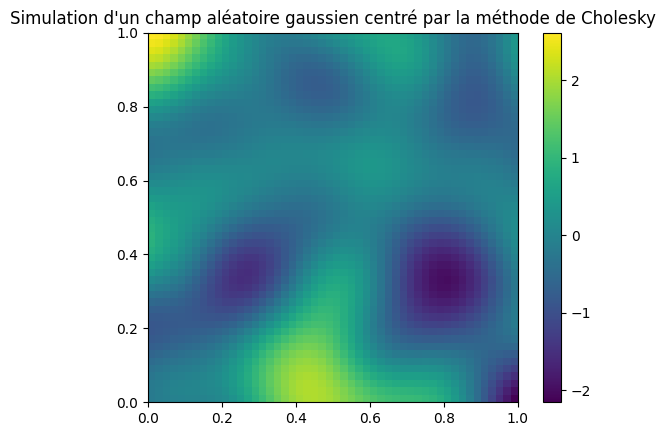

In [4]:
xi = np.random.randn(K.shape[0]) # vecteur gaussien standard

Z = L @ xi #produit matriciel entre L et le vecteur gaussien
Z_field = Z.reshape(n, n) #on a une liste de n^2 points et on la remet en 2D pour l'affichage

#affichage
plt.figure()
plt.imshow(Z_field,extent=[0,1,0,1], origin='lower')
plt.colorbar()
plt.title("Simulation d'un champ aléatoire gaussien centré par la méthode de Cholesky")
plt.show()

5. Essayer d'augmenter le nombre de pas de discrétisation. Que remarquez-vous ? Expliquer pourquoi.

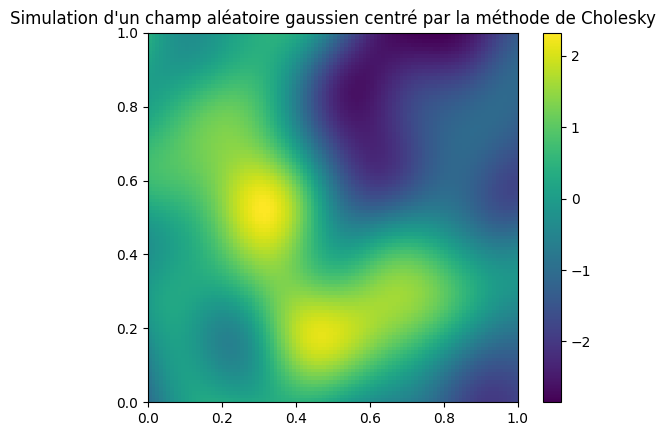

Temps écoulé : 14.30 secondes


In [5]:
import time

n_test = 100  # on affine le pas de discrétisation
t0 = time.time()

x = np.linspace(0, 1, n_test)
X, Y = np.meshgrid(x, x)
points = np.column_stack((X.ravel(), Y.ravel()))
D = distance_matrix(points, points)

K = covariance_gaussienne(D, sigma2, a)
K += 1e-10 * np.eye(K.shape[0])
L = np.linalg.cholesky(K)

xi = np.random.randn(K.shape[0])
Z = L @ xi 
Z_field = Z.reshape(n_test, n_test) 
plt.figure()
plt.imshow(Z_field,extent=[0,1,0,1], origin='lower')
plt.colorbar()
plt.title("Simulation d'un champ aléatoire gaussien centré par la méthode de Cholesky")
plt.show()

t1 = time.time()
print(f"Temps écoulé : {t1 - t0:.2f} secondes")

On remarque que le temps de calcul explose en affinant la discrétisation

# Simulation par la méthode spectrale 

Vu les limitations de la méthode de Cholesky pour des grilles fines, nous allons explorer une méthode alternative basée sur la représentation spectrale de la fonction de covariance. 

1. Soit $C(h) = \exp\left(-\frac{\|h\|^2}{a}\right)$, où $h \in \mathbb{R}^2$. Montrer que :
$$ C(h) = \int_{\mathbb{R}^2} \cos(\langle w, h \rangle) \frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right) dw $$

NB: on pourra s'inspirer du calcul de la fonction caractéristique d’un vecteur gaussien en annexe du chapitre IV du cours.

**Réponse q1 :**
<div class="alert alert-success">

L'intégrale donnée correspond à l'espérance de $\cos(\langle W, h \rangle)$ où $W$ est un vecteur aléatoire gaussien d'espérance nulle et de matrice de covariance $\frac{2}{a}I_2$. Appelons la $I(h)$.

En effet, la densité de $W \sim \mathcal{N}(0, \frac{2}{a}I_2)$ est :
$$f_W(w) = \frac{1}{2\pi (2/a)} \exp\left(-\frac{\|w\|^2}{2(2/a)}\right) = \frac{a}{4\pi} \exp\left(-\frac{a\|w\|^2}{4}\right)$$
Ce qui correspond au terme de densité que l'on a dans l'intégrale.

On remarque que $I(h)=\mathbb{E}[\text{Re}(e^{i\langle W, h \rangle})]=\text{Re}(\mathbb{E}[e^{i\langle W, h \rangle}])$, or comme la densité $f_W$ est paire, $\mathbb{E}[\sin(\langle W, h \rangle)]=0$.

Donc $I(h)=\mathbb{E}[e^{i\langle W, h \rangle}]=\phi_W(h)$ où $\phi_W$ est la fonction caractéristique du vecteur gaussien W.


Or, par définition de la fonction caractéristique d'une gaussienne $\phi_W(h)= e^{-\frac{1}{2}h^T \Sigma h}$, on a :
$$\int_{\mathbb{R}^2} \cos(\langle w, h \rangle) f_W(w) dw = \exp\left(-\frac{1}{2} h^T \left(\frac{2}{a}I\right) h\right) = \exp\left(-\frac{\|h\|^2}{a}\right)$$

On retrouve bien $C(h)$.
</div>

2. Soient $W$ et $\Phi$ deux variables aléatoires indépendantes, de lois respectives $\mathcal{N}(0, \frac{2}{a} I_2)$, avec $I_2$ la matrice identité de dimension 2, et $\mathcal{U}[0, 2\pi[$. Montrer que la variable aléatoire définie en tout point $x \in \mathbb{R}^2$ par :
$$ Z(x) = \sqrt{2} \cos(\langle W, x \rangle + \Phi) $$
est d'espérance nulle et de fonction de covariance $C$.

**Réponse q2 :**

<div class="alert alert-success">

Par linéarité de l'espérance et indépendance entre $W$ et $\Phi$, on calcule d'abord l'espérance conditionnelle par rapport à $W$.

$$ \mathbb{E}[Z(x) | W] = \sqrt{2} \int_{0}^{2\pi} \cos(\langle W, x \rangle + \phi) \frac{1}{2\pi} d\phi = 0$$

On a donc :
$$ \mathbb{E}[Z(x)] = \mathbb{E}[\mathbb{E}[Z(x)|W]] = 0 $$

**Ainsi $Z(x)$ est d'espérance nulle.**


Calculons $Cov(Z(x), Z(y))$. Comme les espérances sont nulles, $Cov(Z(x), Z(y)) = \mathbb{E}[Z(x)Z(y)]$.

$$ \mathbb{E}[Z(x)Z(y)] = \mathbb{E}\left[ \left(\sqrt{2} \cos(\langle W, x \rangle + \Phi)\right) \left(\sqrt{2} \cos(\langle W, y \rangle + \Phi)\right) \right] $$
$$ = 2 \mathbb{E}\left[ \cos(\langle W, x \rangle + \Phi) \cos(\langle W, y \rangle + \Phi) \right] $$

En se rappelant que : $\cos(A+B) + \cos(A-B)=2 \cos A \cos B$, on a:
$$ \mathbb{E}[Z(x)Z(y)] = \mathbb{E}[\cos(\langle W, x+y \rangle + 2\Phi)] + \mathbb{E}[\cos(\langle W, x-y \rangle)] $$

Pour le premier terme, comme pour le calcul de l'espérance, l'intégration sur $\Phi$ sur une période $[0, 2\pi]$ annule le cosinus donc ce terme vaut 0.
Le deuxième terme ne dépend pas de $\Phi$, seulement de $W$. Il reste donc :
$$ \mathbb{E}[Z(x)Z(y)] = \mathbb{E}[\cos(\langle W, x-y \rangle)] $$

En posant $h = x - y$, on reconnaît exactement l'expression étudiée à la question 1. Nous avons démontré que si $W \sim \mathcal{N}(0, \frac{2}{a}I_2)$, alors $\mathbb{E}[\cos(\langle W, h \rangle)] = \exp(-\frac{\|h\|^2}{a})$.


$$ Cov(Z(x), Z(y)) = \exp\left(-\frac{\|x - y\|^2}{a}\right) = C(x, y) $$

**Ainsi $Z(x)$ a bien la fonction de covariance C.**

</div>

3. Soient les suites de variables aléatoires indépendantes $(W_n)_{n \in \mathbb{N}}$ et $(\Phi_n)_{n \in \mathbb{N}}$ telles que $W_n \sim \mathcal{N}(0, \frac{2}{a} I_2)$ et $\Phi_n \sim \mathcal{U}([0, 2\pi])$. Montrer que pour tout ensemble fini de points  $x_1, \ldots, x_n$ dans  $\mathbb{R}^2$ , le vecteur aléatoire $Y = (Y(x_1), \ldots, Y(x_n))$ où :
$$ Y(x_i) = \sqrt{\frac{2}{N}} \sum_{k=1}^{N} \cos(\langle W_k, x_i \rangle + \Phi_k) $$
tend vers un vecteur aléatoire de loi normale multivariée d'espérance nulle et de matrice de covariance $K$ définie par  $K_{ij} = C(x_i - x_j)$.

**Réponse q3 :**


<div class="alert alert-success">

Soit un ensemble fini de points $x_1, \dots, x_n$ dans $\mathbb{R}^2$.

Considérons pour chaque $k \in [\![1, N]\!]$, le vecteur aléatoire $V_k \in \mathbb{R}^n$ défini par ses composantes :
$$ V_k = \begin{pmatrix} \sqrt{2}\cos(\langle W_k, x_1 \rangle + \Phi_k) \\ \vdots \\ \sqrt{2}\cos(\langle W_k, x_n \rangle + \Phi_k) \end{pmatrix} $$

Le vecteur $Y^{(N)}= (Y(x_1), \dots, Y(x_n))$ peut alors s'écrire comme une somme normalisée :
$$ Y^{(N)} = \frac{1}{\sqrt{N}} \sum_{k=1}^{N} V_k $$

Dans un premier temps, les vecteurs $(V_k)$ sont :
- i.i.d. car construits à partir des suites i.i.d $(W_k)$ et $(\Phi_k)$
- d'espérance nulle, en effet d'après la question 2, pour tout $i$, $\mathbb{E}[V_k^{(i)}] = 0$. Donc $\mathbb{E}[V_k] = 0_{\mathbb{R}^n}$.
- de matrice de covariance $K$, en effet d'après la question 2, la covariance entre deux composantes $i$ et $j$ du vecteur $V_k$ est :
    $$ Cov(V_k^{(i)}, V_k^{(j)}) = \mathbb{E}[V_k^{(i)} V_k^{(j)}] = C(x_i - x_j) $$
    C'est exactement la définition de la matrice $K$.

Dans un second temps, le théorème central limite (multidimmensionnel) nous dit que si $V_1, \dots, V_N$ sont des vecteurs aléatoires i.i.d. d'espérance $\mu$ et de matrice de covariance $\Sigma$, alors la somme normalisée converge en loi vers une loi normale :
$$ \frac{1}{\sqrt{N}} \sum_{k=1}^{N} (V_k - \mu) \xrightarrow[N \to \infty]{\mathcal{L}} \mathcal{N}(0, \Sigma) $$

Ici, $\mu = 0$ et $\Sigma = K$.
On en conclut donc que le vecteur $Y^{(N)}$ tend vers un vecteur aléatoire gaussien d'espérance nulle et de matrice de covariance $K$.

</div>

4. Implémenter une fonction basée sur cette méthode pour simuler un champ aléatoire gaussien sur une grille régulière de points dans le domaine  $[0, 1] \times [0, 1]$. Cette fonction prendra en entrée les coordonnées des points de la grille, $a$ et  $N$ et retournera une réalisation du champ aléatoire gaussien simulé.

In [6]:
def simulation_spectrale(points,a, N):
    
    #on génère nos suites de variables aléatoires indépendantes
    W = np.random.normal(0, np.sqrt(2 / a), size=(N, 2)) 
    Phi = np.random.uniform(0, 2 * np.pi, size=N) 
    
    cos_termes = np.cos(points @ W.T + Phi)

    somme_cos = np.sum(cos_termes, axis=1) # somme sur les k (colonnes)
    Z = np.sqrt(2 / N) * somme_cos
    
    return Z

5. Tester cette fonction pour différentes valeurs du nombre de points de discrétisation et de $N$. Proposer un diagnostic permettant de calibrer $N$ afin que les résultats soient conformes aux attentes. Comparer les résultats obtenus avec ceux de la méthode de Cholesky. Quels sont les avantages et les inconvénients de chaque méthode ?

Temps écoulé : 0.21 secondes


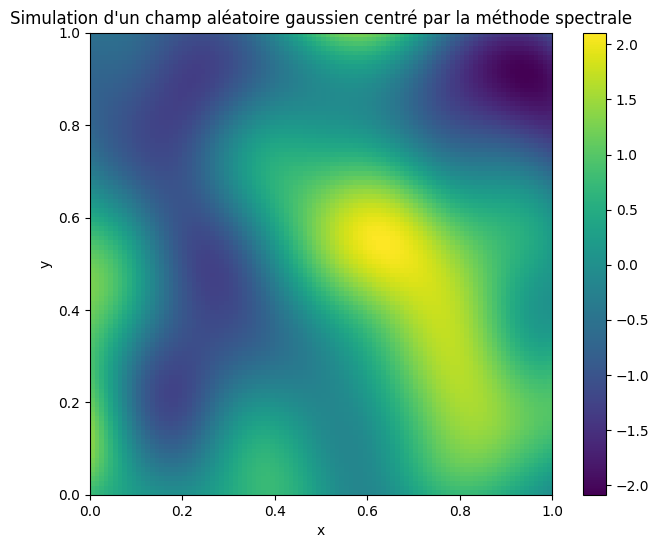

In [7]:
sigma2 = 1.0
a = 0.05
n = 100      
N = 1000 

# on crée la grille comme avant
x = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, x)
points = np.column_stack((X.ravel(), Y.ravel()))


t0 = time.time()
Z = simulation_spectrale(points, a, N)
t1 = time.time()
print(f"Temps écoulé : {t1 - t0:.2f} secondes")

plt.figure(figsize=(8, 6))
plt.imshow(Z.reshape(n, n), extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()
plt.title("Simulation d'un champ aléatoire gaussien centré par la méthode spectrale")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Réponse q5**
<div class="alert alert-success">

Pour que les résultats soient conformes aux attentes, il faut calibrer N. Pour cela, on pourrait tracer la covariance empirique calculée sur la simulation et la comparer à la courbe théorique $C(h) = \exp\left(-\frac{\|h\|^2}{a}\right)$.

Si N est suffisamment grand, les résultats obtenus par la méthode spectrale sont identiques à ceux obtenus par la méthode de Cholesky. 

La différence majeure réside dans le pas de discrétisation:
- Avec la méthode de Cholesky, le temps de calcul explose dès que la grille dépasse une certaine taille (environ $60 \times 60$ points).
- Avec la méthode spectrale, la génération reste quasi-instantanée même pour des grilles très fines ($100 \times 100$ ou plus).

</div>

# Simulation conditionnelle 

On suppose désormais que l'on dispose de valeurs observées du champ aléatoire Gaussien en certains points du domaine. On souhaite simuler des réalisations conditionnelles du champ aléatoire Gaussien en tenant compte de ces observations. On travaillera désormais avec une grille de taille $100 \times 100$.
Soit $X$ un vecteur aléatoire Gaussien partitionné en deux sous-vecteurs $X_1$ et $X_2$, où $X_1$ représente les points observés et $X_2$ les points non observés. 

1. Rappeler l'expression de la distribution jointe de $X = (X_1, X_2)$ puis de la distribution conditionnelle de $X_2$ sachant $X_1$. Montrer que la différence entre l'espérance conditionnelle et le vecteur des points non observés est un vecteur Gaussien d'espérance nulle indépendant du vecteur des points non observés.

**Réponse q1**


<div class="alert alert-success">

**- Distribution jointe**

$X = (X_1, X_2)$ est un vecteur gaussien. Sa loi est entièrement déterminée par son espérance et sa matrice de covariance :

$$
X \sim \mathcal{N}\left(
\begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix},
\begin{pmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{pmatrix}
\right)
$$
où : $\Sigma_{11}$ est la covariance des points observés entre eux, $\Sigma_{22}$ est la covariance des points non observés entre eux et $\Sigma_{12} = \Sigma_{21}^T$ est la covariance entre observés et non observés.

La fonction de densité de probabilité jointe, notée $f_X(x)$, est donc définie pour tout $x \in \mathbb{R}^d$ par :

$$ f_X(x) = \frac{1}{\sqrt{(2\pi)^d \det(\Sigma)}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right) $$
où $x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$, $\mu=\begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix}$ et $\Sigma=\begin{pmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{pmatrix}$

**- Distribution conditionnelle**

La loi conditionnelle de $X_2$ sachant $X_1 = x_1$ est une loi normale avec :
- $$\mathbb{E}[X_2 | X_1=x_1] = \mu_2 + \Sigma_{21}\Sigma_{11}^{-1}(x_1 - \mu_1) $$
- $$ Var(X_2 | X_1=x_1) = \Sigma_{22} - \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12} $$


**- Différence entre le vecteur des points non observés $X_2$ et l'espérance conditionnelle $\mathbb{E}[X_2 | X_1]$**

Posons $Z = X_2 - \mathbb{E}[X_2 | X_1]$.
C'est une combinaison linéaire du vecteur gaussien $X$, donc $Z$ est gaussien.
-  $\mathbb{E}[Z] = \mathbb{E}[X_2] - \mathbb{E}[\mathbb{E}[X_2 | X_1]] = 0$.

- Pour montrer l'indépendance entre $Z$ et $X_1$ Calculons la covariance entre $Z$ et les observations $X_1$ :
    $$ Cov(Z, X_1) = Cov(X_2 - \Sigma_{21}\Sigma_{11}^{-1}X_1, X_1) $$
    $$ = Cov(X_2, X_1) - \Sigma_{21}\Sigma_{11}^{-1}Cov(X_1, X_1) $$
    $$ = \Sigma_{21} - \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{11} = 0 $$
    La covariance étant nulle et $Z$ et $X_1$ sont des combinaisons linéaires de X donc $Z$ est indépendant des observations $X_1$.

</div>


On va donc chercher à simuler directement cette différence pour obtenir des réalisations conditionnelles du champ aléatoire Gaussien.

2. Générer 50 points uniformément répartis dans le domaine  $[0, 1] \times [0, 1]$ et simuler des observations du champ aléatoire Gaussien en ces points.


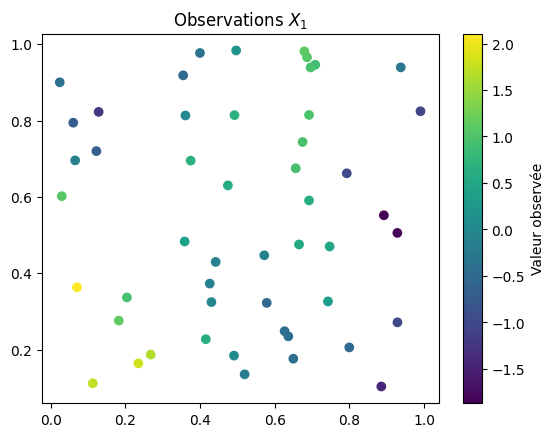

In [8]:
a = 0.05
sigma2 = 1.0
n_obs = 50

points_obs = np.random.rand(n_obs, 2)

# calcul de la covariance 
D_obs = distance_matrix(points_obs, points_obs)
K_11 = covariance_gaussienne(D_obs, sigma2, a)


# pour la simulation  des observations du champ aléatoire gaussien on utilise ce qu'on avait déjà fait: métode de Cholesky
L = np.linalg.cholesky(K_11 + 1e-10 * np.eye(n_obs))
X1 = L @ np.random.randn(K_11.shape[0]) 

plt.figure()
plt.scatter(points_obs[:, 0], points_obs[:, 1], c=X1)
plt.colorbar(label='Valeur observée')
plt.title("Observations $X_1$")
plt.show()


3. Calculer l'espérance conditionnelle aux points de la grille et la représenter.

NB : Pour assurer la stabilité numérique, on doit ajouter un terme de régularisation plus important à la diagonale de la matrice de covariance avant de calculer son inverse ($10^{-2} I$ conviendra ici).

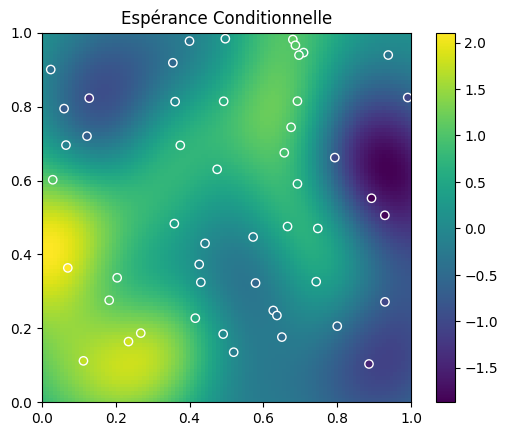

In [9]:
n= 100

x = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, x)
points = np.column_stack((X.ravel(), Y.ravel()))

D = distance_matrix(points, points_obs) 
K_21 = covariance_gaussienne(D, sigma2, a)

K_11_reg = K_11 + 1e-2 * np.eye(n_obs)

E_cond = K_21 @ np.linalg.inv(K_11_reg) @ X1


plt.figure()
plt.imshow(E_cond.reshape(n, n), extent=[0, 1, 0, 1], origin='lower')
plt.scatter(points_obs[:, 0], points_obs[:, 1], c=X1, edgecolors='white')
plt.colorbar()
plt.title("Espérance Conditionnelle")
plt.show()

4. Pour générer de manière indépendante la différence entre l'espérance conditionnelle et le vecteur des points non observés, on génère une seconde réalisation du champ aléatoire aux points de la grille **et** aux coordonnées des points observés par la méthode spectrale. On calcule ensuite la différence entre cette réalisation et l'espérance conditionnelle sachant les valeurs simulées aux coordonnées des points observés. Enfin, on additionne cette différence à l'espérance conditionnelle sachant les observations pour obtenir une réalisation conditionnelle du champ aléatoire Gaussien sur la grille. Implémenter cette approche et représenter une réalisation conditionnelle du champ aléatoire Gaussien sur la grille.

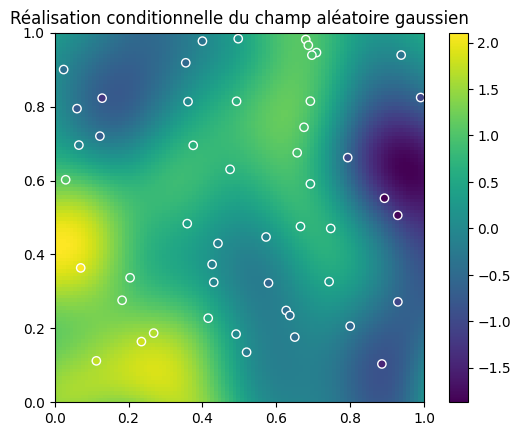

In [10]:
def simulation_conditionnelle(points_grille, points_obs, X1, K_21, K_11, a, N=1000):

    S= simulation_spectrale(np.vstack((points_grille, points_obs)), a, N)
    
    S_grille = S[:points_grille.shape[0]]
    S_obs = S[points_grille.shape[0]:]
    
    S_cond = K_21 @ np.linalg.inv(K_11) @ S_obs
    
    diff = S_grille - S_cond

    return diff


diff = simulation_conditionnelle(points, points_obs, X1, K_21, K_11, a)
Z_cond = E_cond + diff


plt.figure()
plt.imshow(Z_cond.reshape(n, n), extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.scatter(points_obs[:, 0], points_obs[:, 1], c=X1, edgecolors='white')
plt.colorbar()
plt.title('Réalisation conditionnelle du champ aléatoire gaussien')
plt.show()

5. Générer 500 simulations conditionnelles et comparer la moyenne empirique de ces simulations avec l'espérance conditionnelle calculée précédemment. Que constate-t-on ? Expliquer pourquoi.

Temps écoulé : 91.54 secondes


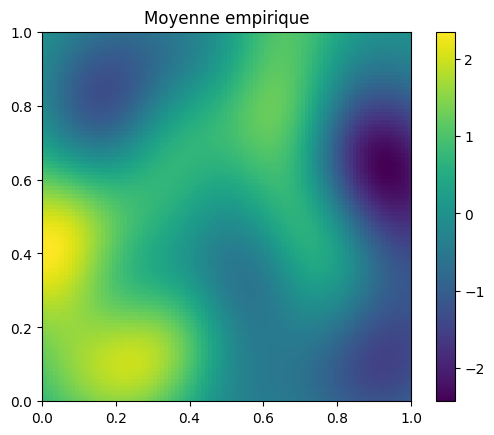

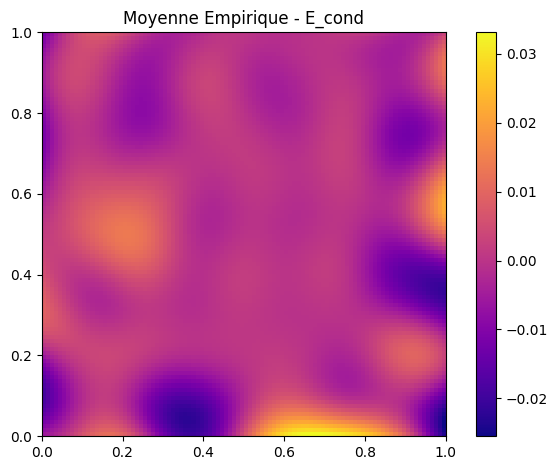

In [11]:
n_simulations = 500
somme_simulations = np.zeros(points.shape[0])

t0 = time.time()
for k in range(n_simulations):
    res = simulation_conditionnelle(points, points_obs, X1, K_21, K_11, a)
    somme_simulations += (E_cond + res)

moy_simulations = somme_simulations / n_simulations
print(f"Temps écoulé : {time.time() - t0:.2f} secondes")

plt.figure()
plt.imshow(moy_simulations.reshape(n, n), extent=[0, 1, 0, 1], origin='lower')
plt.title("Moyenne empirique")
plt.colorbar()
plt.show()
plt.figure()
diff = moy_simulations - E_cond
plt.imshow(diff.reshape(n, n), extent=[0, 1, 0, 1], origin='lower',cmap="plasma")
plt.title("Moyenne Empirique - E_cond")
plt.colorbar()

plt.tight_layout()
plt.show()


**Réponse q5**
<div class="alert alert-success">
On remarque que la moyenne empirique des 500 simulations tend vers l'espérance conditionnelle calculée à la question 3. La carte de différence montre des valeurs très proches de zéro.
</div>

# Simulation non-stationnaire

On souhaite désormais simuler un champ aléatoire Gaussien non-stationnaire, c'est-à-dire dont la fonction de covariance dépend de la position dans le domaine. Ces modèles plus complexes offrent une plus grande flexibilité pour modéliser des phénomènes naturels. En particulier, on va chercher à faire varier la valeur du paramètre d'échelle $a$ en fonction de la position. On considère une fonction de covariance de la forme :
$$C(x, y) = 2\frac{\sqrt{a(x) a(y)}}{a(x)+a(y)} \exp\left(-\frac{2\|x - y\|^2}{a(x)+a(y)}\right),$$
où $a : [0,1]^2 \to \mathbb{R}_+^*$ est une fonction définissant le paramètre d'échelle en chaque point du domaine.

Pour générer des réalisations de ce champ aléatoire non-stationnaire, on peut adapter la méthode spectrale en utilisant une approche locale. Précisément, on va considérer la modification suivante de la méthode spectrale :

$$Z(x) = \sqrt{\frac{2f_x(W)}{g(W)}}\cos(\langle W, x \rangle + \Phi)$$

où $W$ et $\Phi$ sont deux variables aléatoires indépendantes, de lois respectives $\mathcal{N}(0, \frac{2}{a} I_2)$ et $\mathcal{U}[0, 2\pi[$, et où $f_x$ est la densité de la loi $\mathcal{N}(0, \frac{2}{a(x)} I_2)$ et $g$ est la densité de la loi $\mathcal{N}(0, \frac{2}{a} I_2)$ pour $a = \inf_{x \in [0,1]^2} a(x)>0$, avec $a>0$.

1. Justifier que cette modification permet de simuler un champ aléatoire Gaussien non-stationnaire avec la fonction de covariance donnée précédemment. Quelle technique de simulation vue en cours est-elle utilisée ici ?

2. Implémenter cette méthode pour simuler un champ aléatoire Gaussien non-stationnaire sur une grille régulière de points dans le domaine  $[0, 1] \times [0, 1]$. On choisira, par exemple, une fonction $a(x)$ variant linéairement selon l'axe des ordonnées entre deux valeurs $a_{min}=0.01$ et $a_{max}=0.1$ sur le domaine. Commenter les résultats obtenus.